# R语言数据处理120题
## 公众号：早起Python
### 题：刘早起
### 解：陈熹
本套习题源于[pandas进阶修炼120题系列](https://mp.weixin.qq.com/s/WvgOlFGK0FToobl9ws2oSQ)

但由于R语言和Pandas有部分差别较大，在不修改原题的基础上制作完成

所有代码均已在本地测试通过，但是由于不同包的版本不同可能会导致代码报错

请自行按照提示修改或者百度解决

### 依赖以下包，请提前安装
- tibble
- Hmisc
- readr
- rJava
- xlsxjars
- dplyr
- stringr
- openxlsx
- pryr
- ggplot2
- patchwork
- mice
- glue
- tidyr
- RcppRoll
- plyr

## 第一期｜基础20题

### 1.数据创建

In [7]:
### 方法1
df <- data.frame(
  "grammer" = c("Python","C","Java","GO",NA,"SQL","PHP","Python"),
  "score" = c(1,2,NA,4,5,6,7,10)
)

In [3]:
df

grammer,score
Python,1
C,2
Java,NA
GO,4
NA,5
SQL,6
PHP,7
Python,10


In [6]:
### 方法2
library(tibble)
df <- tibble(
  "grammer" = c("Python","C","Java","GO",NA,"SQL","PHP","Python"),
  "score" = c(1,2,NA,4,5,6,7,10)
)

### 2.数据提取
提取含有字符串"Python"的行

In [7]:
df[which(df$grammer == 'Python'),]

grammer,score
Python,1
Python,10


### 3.数据提取
输出df的所有列名

In [9]:
names(df)

[1] "grammer" "score"

### 4.数据修改
修改第二列列名为'popularity'

In [8]:
options(warn=-1)
library(dplyr)
library(tidyverse)
df <- df %>% rename(popularity = score)

In [9]:
df

grammer,popularity
Python,1
C,2
Java,NA
GO,4
NA,5
SQL,6
PHP,7
Python,10


### 5.数据统计
统计grammer列中每种编程语言出现的次数·

In [23]:
table(df$grammer)


     C     GO   Java    PHP Python    SQL 
     1      1      1      1      2      1 

### 6.缺失值处理
将空值用上下值的平均值填充

In [26]:
#将survival升级即可
library(Hmisc)
index <- which(is.na(df$popularity))
df$popularity <- impute(df$popularity,
                       (unlist(df[index-1, 2] +
                               df[index+1, 2]))/2)

ERROR: Error: package ‘survival’ 2.39.4 was found, but >= 2.40.1 is required by ‘Hmisc’


### 7.数据提取
提取popularity列中值大于3的行

In [29]:
df %>%
  filter(popularity > 3)

grammer,popularity
GO,4
NA,5
SQL,6
PHP,7
Python,10


### 8.数据去重
按照grammer列进行去重

In [10]:
df[!duplicated(df$grammer),]

grammer,popularity
Python,1
C,2
Java,NA
GO,4
NA,5
SQL,6
PHP,7


### 9.数据计算
计算popularity列平均值

In [31]:
#> 第一种
mean(df$popularity)

[1] NA

In [32]:
#> 第二种
df %>%
  summarise(mean = mean(popularity))

mean
NA


### 10.格式转换
将grammer列转换为list

In [33]:
unlist(df$grammer)

[1] Python C      Java   GO     <NA>   SQL    PHP    Python
Levels: C GO Java PHP Python SQL

### 11.数据保存
将DataFrame保存为EXCEL

In [34]:
#R对EXCEL文件不太友好
#第一种方法：利用readr包转为csv再用EXCEL打开
#文件本质依然是csv
library(readr)
write_excel_csv(df,'filename.csv')

### 12.数据查看
查看数据行列数

In [4]:
dim(df)

[1] 8 2

### 13.提取数据
提取popularity列值大于3小于7的行

In [14]:
library(dplyr)
df %>%
  filter(popularity > 3 & popularity <7)

grammer,popularity
GO,4
NA,5
SQL,6


### 14.数据处理
交换两列数据

In [15]:
df <- df %>%
    select(popularity,everything())

### 15.数据提取
提取popularity列最大值所在行

In [20]:
df %>%
  filter(popularity == max(popularity))

popularity,grammer


### 16.数据查看
查看最后5行数据

In [21]:
tail(df,5)

,popularity,grammer
4,4,GO
5,5,NA
6,6,SQL
7,7,PHP
8,10,Python


### 17.数据修改
删除最后一数据

In [22]:
df[-dim(df)[1],]

popularity,grammer
1,Python
2,C
NA,Java
4,GO
5,NA
6,SQL
7,PHP


### 18.数据修改
添加一行数据['Perl',6.6]

In [27]:
row <- data.frame(
  "grammer" = c("Perl"),
  "popularity" = c(6.6)
) # 需要和列的位置对应
df <- rbind(df,row)

### 19.数据排序
对数据按照"popularity"列值的大小进行排序

In [29]:
df <- df %>%
  arrange(popularity)

### 20.数据统计
统计grammer列每个字符串的长度

In [31]:
# 由于在线平台的survival包无法升级，请下载至本地并升级即可正常执行，代码已经通过测试！
library(Hmisc)
library(stringr)
df$grammer <- impute(df$grammer,'R')
str_length(df$grammer)

df$len_str <- str_length(df$grammer)

Loading required package: lattice


ERROR: Error: package ‘survival’ 2.39.4 was found, but >= 2.40.1 is required by ‘Hmisc’


### 第二期｜基本数据处理：21-50

### 21.数据读取
读取本地Excel数据

In [25]:
library(readr)
df <- read_csv('pandas120.csv')

Parsed with column specification:
cols(
  `﻿createTime` = col_character(),
  education = col_character(),
  salary = col_character()
)


### 22.数据查看
查看df数据前5行

In [11]:
# 默认是6行，可指定行数
head(df,5)

﻿createTime,education,salary
2020/3/16 11:30,本科,20k-35k
2020/3/16 10:58,本科,20k-40k
2020/3/16 10:46,不限,20k-35k
2020/3/16 10:45,本科,13k-20k
2020/3/16 10:20,本科,10k-20k


### 23.将salary列数据转换为最大值与最小值的平均值

In [26]:
library(stringr)
df$salary <- df$salary %>%
  str_replace_all('k','') %>%
  str_split('-',simplify = T) %>%
  apply(2,as.numeric) %>%
  rowMeans() * 1000
df

﻿createTime,education,salary
2020/3/16 11:30,本科,27500
2020/3/16 10:58,本科,30000
2020/3/16 10:46,不限,27500
2020/3/16 10:45,本科,16500
2020/3/16 10:20,本科,15000
2020/3/16 10:33,本科,14000
2020/3/16 10:11,硕士,23000
2020/3/16 09:49,本科,12500
2020/3/16 09:25,不限,7000
2020/3/16 09:35,本科,16000


### 24.将数据根据学历进行分组并计算平均薪资

In [14]:
library(dplyr)
library(tibble)
df %>%
  group_by(education) %>%
  summarise(mean = mean(salary))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



education,mean
不限,19600.00
大专,10000.00
本科,19361.34
硕士,20642.86


### 25.将createTime列时间转换为月-日

In [ ]:
#转化后该列属性是 字符串，R中对时间格式要求严格
df$createTime <- as.Date(df$createTime) %>%
  str_replace('2020-','')

### 26.查看索引、数据类型和内存信息

In [21]:
str(df)

# 内存查看需要用到其他的库
library(pryr)
object_size(df)
# 6.66 kB

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	135 obs. of  3 variables:
 $ ﻿createTime: chr  "2020/3/16 11:30" "2020/3/16 10:58" "2020/3/16 10:46" "2020/3/16 10:45" ...
 $ education : chr  "本科" "本科" "不限" "本科" ...
 $ salary    : num  27500 30000 27500 16500 15000 14000 23000 12500 7000 16000 ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 3
  .. ..$ ﻿createTime: list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ education : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ salary    : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  ..$ default: list()
  .. ..- attr(*, "class")= chr  "collector_guess" "collector"
  ..- attr(*, "class")= chr "col_spec"


9.24 kB

### 27查看数值型列的汇总统计

In [22]:
summary(df)

  ﻿createTime         education             salary     
 Length:135         Length:135         Min.   : 3500  
 Class :character   Class :character   1st Qu.:14000  
 Mode  :character   Mode  :character   Median :17500  
                                       Mean   :19159  
                                       3rd Qu.:25000  
                                       Max.   :45000  

### 28.新增一列根据salary将数据分为三组

In [28]:
#用ifelse也可以
#底层原理有差别但实现结果一样
df <- df %>%
  mutate(categories = case_when(
    df$salary >= 0 & df$salary < 5000 ~ '低',
    df$salary >= 5000 & df$salary < 20000 ~ '低',
    TRUE ~ '高'
  ))

### 29.按照salary列对数据降序排列

In [30]:
df %>%
  arrange(desc(salary))

﻿createTime,education,salary,categories
2020/3/16 11:30,本科,45000,高
2020/3/16 11:04,本科,40000,高
2020/3/16 10:36,本科,37500,高
2020/3/16 11:01,本科,37500,高
2020/3/16 09:54,硕士,37500,高
2020/3/16 11:01,本科,35000,高
2020/3/16 10:41,本科,35000,高
2020/3/16 10:41,本科,35000,高
2020/3/16 11:30,本科,32500,高
2020/3/16 10:58,本科,30000,高


### 30.取出第33行数据

In [31]:
df[33,]

﻿createTime,education,salary,categories
2020/3/16 10:07,硕士,22500,高


### 31.计算salary列的中位数

In [32]:
median(df$salary)

[1] 17500

### 32.绘制薪资水平频率分布直方图

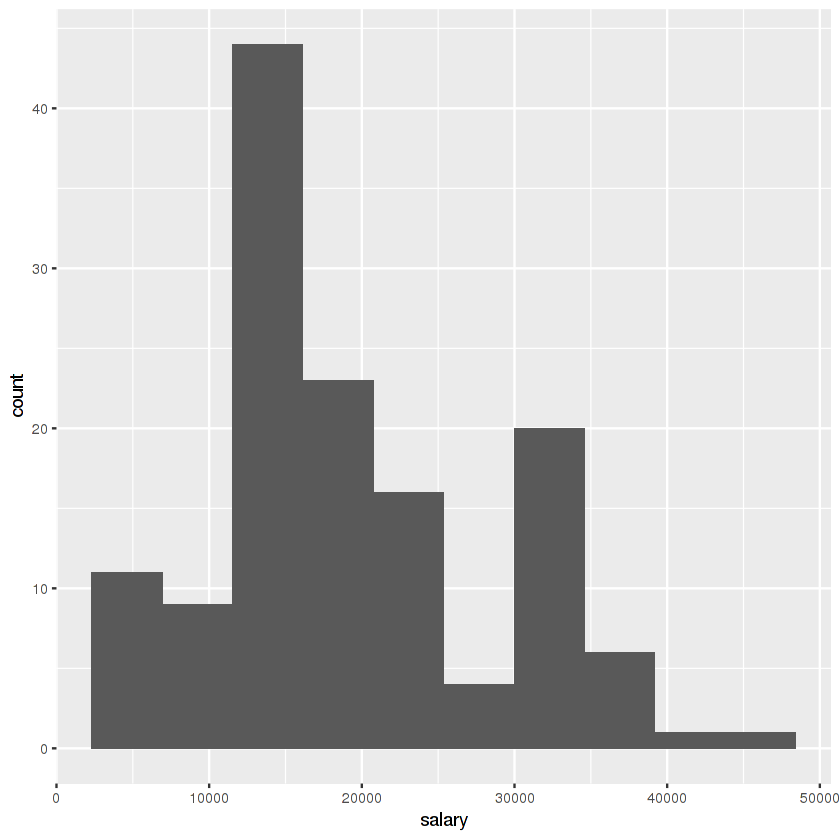

In [36]:
library(ggplot2)

df %>%
  ggplot(aes(salary)) +
  geom_histogram(bins = 10) # 这个跟python的bins一致


### 32绘制薪资水平密度曲线

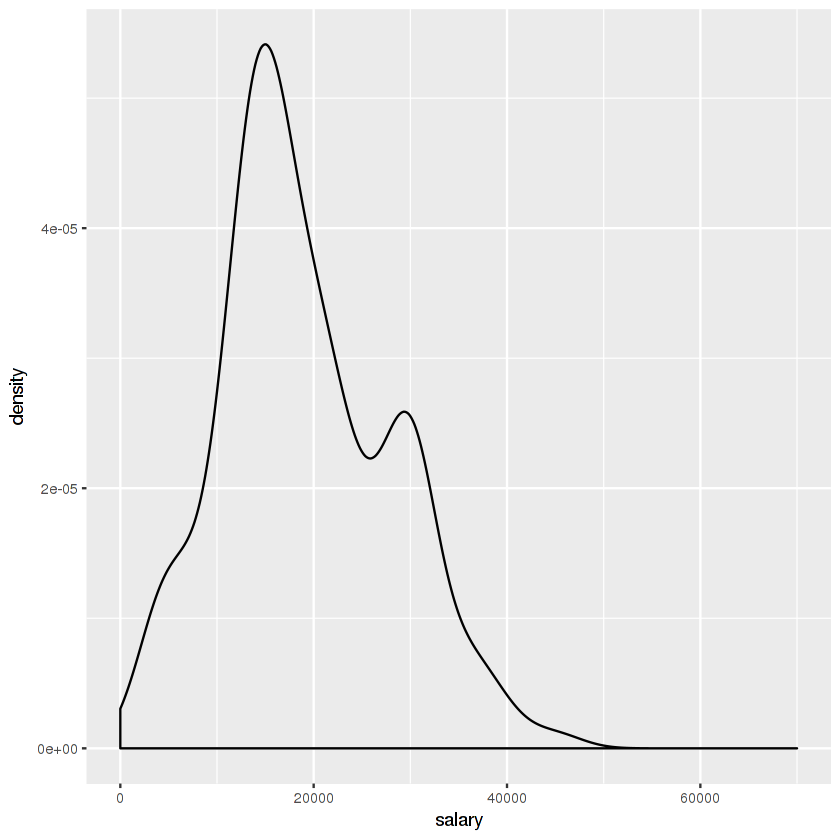

In [35]:
df %>%
  ggplot(aes(salary)) +
  geom_density() +
  xlim(c(0,70000))

### 34删除最后一列categories

In [38]:
df <- df[,-4]

### 35将df的第一列与第二列合并为新的一列

In [40]:
df <- df %>%
  mutate(test = paste0(df$education,df$createTime))


Warning message:
“Unknown column 'createTime'”

### 36将education列与salary列合并为新的一列
备注：salary为int类型，操作与35题有所不同

In [42]:
df <- df %>%
  mutate(test1 =
           paste0(df$salary,df$education))

### 37.计算salary最大值与最小值之差

In [44]:
df %>%
  summarise(delta = max(salary) - min(salary)) %>%
  unlist()

delta 
41500

### 38.将第一行与最后一行拼接

In [45]:
rbind(df[1,],df[dim(df)[1],])

﻿createTime,education,salary,test,test1
2020/3/16 11:30,本科,27500,本科,27500本科
2020/3/16 11:19,本科,30000,本科,30000本科


### 39.将第8行数据添加至末尾

In [46]:
rbind(df,df[8,])

﻿createTime,education,salary,test,test1
2020/3/16 11:30,本科,27500,本科,27500本科
2020/3/16 10:58,本科,30000,本科,30000本科
2020/3/16 10:46,不限,27500,不限,27500不限
2020/3/16 10:45,本科,16500,本科,16500本科
2020/3/16 10:20,本科,15000,本科,15000本科
2020/3/16 10:33,本科,14000,本科,14000本科
2020/3/16 10:11,硕士,23000,硕士,23000硕士
2020/3/16 09:49,本科,12500,本科,12500本科
2020/3/16 09:25,不限,7000,不限,7000不限
2020/3/16 09:35,本科,16000,本科,16000本科


### 40.查看每列的数据类型

In [47]:
str(df)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	135 obs. of  5 variables:
 $ ﻿createTime: chr  "2020/3/16 11:30" "2020/3/16 10:58" "2020/3/16 10:46" "2020/3/16 10:45" ...
 $ education : chr  "本科" "本科" "不限" "本科" ...
 $ salary    : num  27500 30000 27500 16500 15000 14000 23000 12500 7000 16000 ...
 $ test      : chr  "本科" "本科" "不限" "本科" ...
 $ test1     : chr  "27500本科" "30000本科" "27500不限" "16500本科" ...


### 41.将createTime列设置为索引

In [ ]:
df %>%
  tibble::column_to_rownames('createTime')

### 42.生成一个和df长度相同的随机数dataframe

In [51]:
df1 <- sapply(135,function(n) {
  replicate(n,sample(1:10,1))
})
# 列名暂时不一样，下一题重命名

### 43.将上一题生成的dataframe与df合并

In [52]:
df <- cbind(df,df1) %>%
  rename(`0` = df1)
# 非常规命名需要用``包裹变量名

### 44.生成新的一列new为salary列减去之前生成随机数列

In [53]:
df <- df %>%
  mutate(new = salary - `0`)

### 45.检查数据中是否含有任何缺失值

In [54]:
# 这个包的结果呈现非常有趣
library(mice)
md.pattern(df)


Attaching package: ‘mice’

The following object is masked from ‘package:RCurl’:

    complete

Warning message in data.matrix(x):
“NAs introduced by coercion”Warning message in data.matrix(x):
“NAs introduced by coercion”Warning message in data.matrix(x):
“NAs introduced by coercion”Warning message in data.matrix(x):
“NAs introduced by coercion”

salary,0,new,﻿createTime,education,test,test1,
1,1,1,0,0,0,0,4
0,0,0,135,135,135,135,540


### 46.将salary列类型转换为浮点数

In [56]:
as.double(df$salary)

[1] 27500 30000 27500 16500 15000 14000 23000 12500  7000 16000 20000 10000
 [13] 30000 25000 30000 12500 37500 12500 35000 20000 11500 30000 20000 22500
 [25] 17500 15000 30000 30000 20000 17500 22500 22500 22500 30000 24000 16000
 [37] 22500 40000 30000 30000 20000 30000 12500 30000 12000 30000 11500 17500
 [49] 16000 12500 13500 15000 16500 45000 15000 25000 22500 20000  9500 22500
 [61]  9500 17500 35000 25000 12000 18000 27500 14000 17500 15000 12000  6500
 [73] 14000 14000 20000 25000 14000  6500 15000 32500 17500 16000  5000 30000
 [85] 14000 15000 20000 15000 15000 11000 15000 14000 35000 30000 15000 21500
 [97]  3500 30000 14000 14000 20000 37500 15000 16000  5000 21500 15000 16000
[109] 12500  5000  4000 16000 26500  3500 14000  8500 20000 30000 30000 18500
[121] 11500  5000 16000  4500 20000 12500  4000 12500 22500 20000 14000 37500
[133] 30000 19000 30000

### 47.计算salary大于10000的次数

In [57]:
df %>%
  filter(salary > 10000) %>%
  dim(.) %>%
  .[1]

[1] 119

### 48.查看每种学历出现的次数

In [58]:
table(df$education)


不限 大专 本科 硕士 
   5    4  119    7 

### 49.查看education列共有几种学历

In [59]:
length(unique(df$education))
# [1] 4

[1] 4

### 50.提取salary与new列的和大于60000的最后3行

In [60]:
df[df$salary + df$new > 60000,] %>%
  .[nrow(.)-3+1:nrow(.),] %>%
  na.omit(.)

,﻿createTime,education,salary,test,test1,0,new
93,2020/3/16 10:41,本科,35000,本科,35000本科,6,34994
102,2020/3/16 11:01,本科,37500,本科,37500本科,3,37497
132,2020/3/16 09:54,硕士,37500,硕士,37500硕士,5,37495


### 第三期｜金融数据处理：51-80

### 51.读取本地Excel数据

In [61]:
library(readr)
df <- read_csv('600000.SH.csv')

Parsed with column specification:
cols(
  `﻿代码` = col_character(),
  简称 = col_character(),
  日期 = col_date(format = ""),
  `前收盘价(元)` = col_double(),
  `开盘价(元)` = col_double(),
  `最高价(元)` = col_double(),
  `最低价(元)` = col_double(),
  `收盘价(元)` = col_double(),
  `成交量(股)` = col_character(),
  `成交金额(元)` = col_character(),
  `涨跌(元)` = col_double(),
  `涨跌幅(%)` = col_double(),
  `均价(元)` = col_character(),
  `换手率(%)` = col_character(),
  `A股流通市值(元)` = col_double(),
  `总市值(元)` = col_double(),
  `A股流通股本(股)` = col_double(),
  市盈率 = col_double()
)


### 52.查看数据前三行

In [63]:
head(df,3)

﻿代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
600000.SH,浦发银行,2016-01-04,16.1356,16.1444,16.1444,15.4997,15.7205,42240610,754425783,-0.4151,-2.5725,17.8602,0.2264,3.32032e+11,3.32032e+11,18653471415,6.5614
600000.SH,浦发银行,2016-01-05,15.7205,15.4644,15.9501,15.3672,15.8618,58054793,1034181474,0.1413,0.8989,17.8139,0.3112,3.35016e+11,3.35016e+11,18653471415,6.6204
600000.SH,浦发银行,2016-01-06,15.8618,15.8088,16.0208,15.6234,15.9855,46772653,838667398,0.1236,0.7795,17.9307,0.2507,3.37628e+11,3.37628e+11,18653471415,6.6720


### 53.查看每列数据缺失值情况

In [64]:
colSums(is.na(df))

﻿代码            简称            日期    前收盘价(元)      开盘价(元) 
              1               2               2               2               2 
     最高价(元)      最低价(元)      收盘价(元)      成交量(股)    成交金额(元) 
              2               2               2               2               2 
       涨跌(元)       涨跌幅(%)        均价(元)       换手率(%) A股流通市值(元) 
              2               2               2               2               2 
     总市值(元) A股流通股本(股)          市盈率 
              2               2               2

### 54.提取日期列含有空值的行

In [65]:
df[is.na(df$日期),]

﻿代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
数据来源：Wind资讯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


### 55.输出每列缺失值具体行数

In [ ]:
library(glue)

for (i in names(df)){
  if(sum(is.na(df[,'日期'])) != 0){
    res1 <- which(is.na(df[,i]))
    res2 <- paste(res1,collapse = ',')
    print(glue('列名："{i}", 第[{res2}]行有缺失值'))
  }
}

### 56.删除所有存在缺失值的行

In [67]:
df <- na.omit(df)

### 57.绘制收盘价的折线图

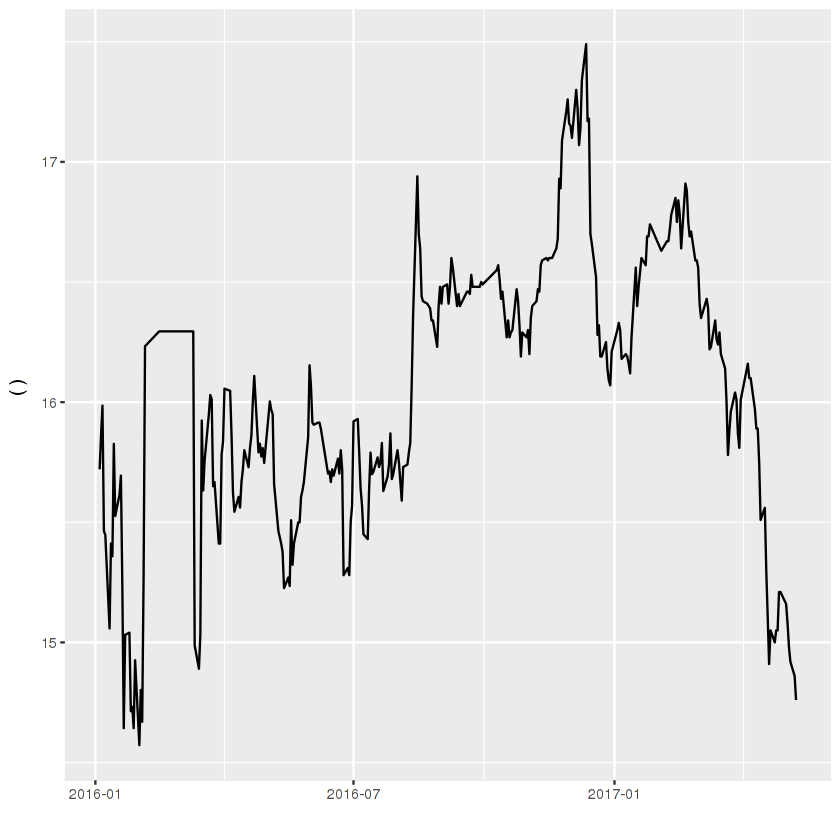

In [68]:
library(ggplot2)

df %>%
  ggplot(aes(日期,`收盘价(元)`)) +
  geom_line()

### 58.同时绘制开盘价与收盘价

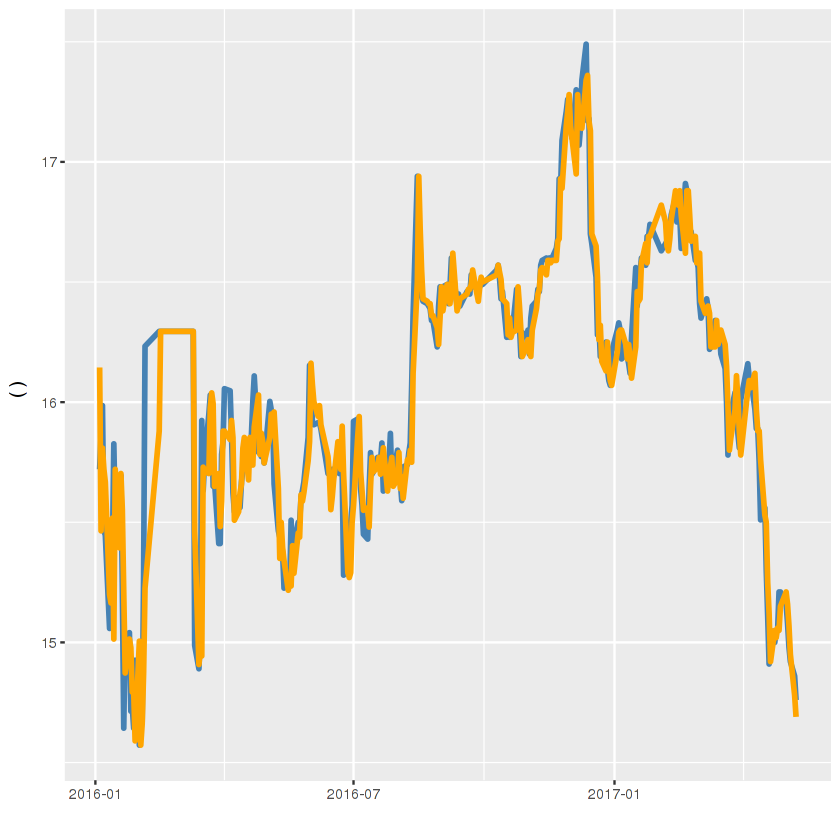

In [70]:
df %>%
  ggplot() +
  geom_line(aes(日期,`收盘价(元)`), size=1.2, color='steelblue') +
  geom_line(aes(日期,`开盘价(元)`), size=1.2, color='orange') +
  ylab(c('价格(元)'))
# 这种画出来没有图例，当然可以手动添加，但为了映射方便可以用另一种方法

In [ ]:
### 方法二
library(tidyr)

df %>%
  select(日期,`开盘价(元)`,`收盘价(元)`) %>%
  pivot_longer(c(`开盘价(元)`,`收盘价(元)`),
               names_to='type',values_to='price') %>%
  ggplot(aes(日期,price,color=type)) +
  geom_line(size=1.2) +
  scale_color_manual(values=c('steelblue','orange')) +
  theme_bw() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    legend.title = element_blank(),
    legend.position = c(0.86, 0.9)
  )

### 59.绘制涨跌幅的直方图

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


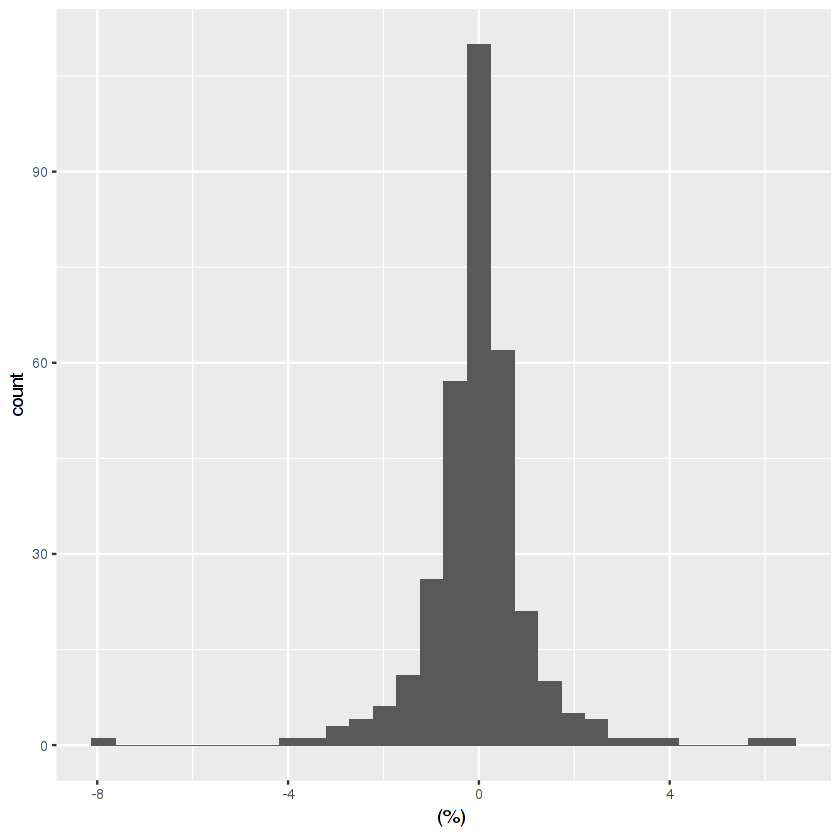

In [71]:
df %>%
  ggplot(aes(`涨跌幅(%)`)) +
  geom_histogram()
# 可以指定bins

### 60.让直方图更细致

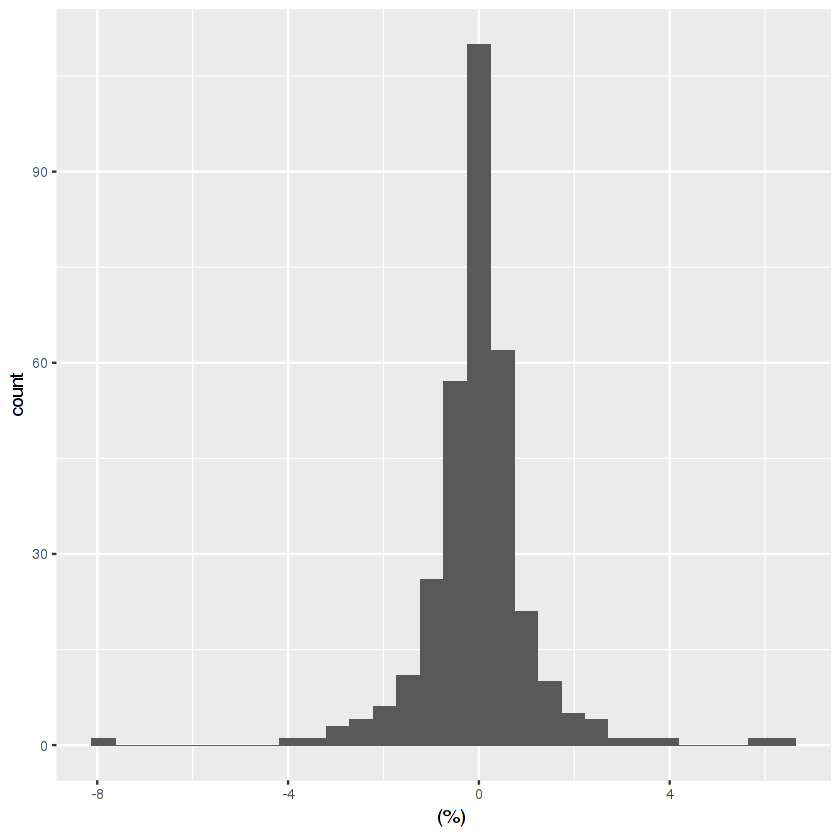

In [72]:
df %>%
  ggplot(aes(`涨跌幅(%)`)) +
  geom_histogram(bins=30)

### 61.以data的列名创建一个dataframe

In [73]:
temp <- as_tibble(names(df))

### 62.打印所有换手率不是数字的行

In [74]:
#换手率这一列属性为chr，需要先强转数值型
#如果转换失败会变成NA，判断即可
df[is.na(as.numeric(df$`换手率(%)`)),]

Warning message in lapply(x, `[`, i):
“NAs introduced by coercion”

﻿代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
600000.SH,浦发银行,2016-02-16,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0,0,--,--,3.44157e+11,3.44157e+11,18653471415,6.801
600000.SH,浦发银行,2016-02-17,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0,0,--,--,3.44157e+11,3.44157e+11,18653471415,6.801
600000.SH,浦发银行,2016-02-18,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0,0,--,--,3.44157e+11,3.44157e+11,18653471415,6.801
600000.SH,浦发银行,2016-02-19,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0,0,--,--,3.44157e+11,3.44157e+11,18653471415,6.801
600000.SH,浦发银行,2016-02-22,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0,0,--,--,3.44157e+11,3.44157e+11,18653471415,6.801
600000.SH,浦发银行,2016-02-23,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0,0,--,--,3.44157e+11,3.44157e+11,18653471415,6.801
600000.SH,浦发银行,2016-02-24,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0,0,--,--,3.44157e+11,3.44157e+11,18653471415,6.801
600000.SH,浦发银行,2016-02-25,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0,0,--,--,3.44157e+11,3.44157e+11,18653471415,6.801
600000.SH,浦发银行,2016-02-26,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0,0,--,--,3.44157e+11,3.44157e+11,18653471415,6.801
600000.SH,浦发银行,2016-02-29,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0,0,--,--,3.44157e+11,3.44157e+11,18653471415,6.801


### 63.打印所有换手率为--的行

In [75]:
df %>%
  filter(`换手率(%)` == '--')

﻿代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
600000.SH,浦发银行,2016-02-16,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0,0,--,--,3.44157e+11,3.44157e+11,18653471415,6.801
600000.SH,浦发银行,2016-02-17,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0,0,--,--,3.44157e+11,3.44157e+11,18653471415,6.801
600000.SH,浦发银行,2016-02-18,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0,0,--,--,3.44157e+11,3.44157e+11,18653471415,6.801
600000.SH,浦发银行,2016-02-19,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0,0,--,--,3.44157e+11,3.44157e+11,18653471415,6.801
600000.SH,浦发银行,2016-02-22,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0,0,--,--,3.44157e+11,3.44157e+11,18653471415,6.801
600000.SH,浦发银行,2016-02-23,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0,0,--,--,3.44157e+11,3.44157e+11,18653471415,6.801
600000.SH,浦发银行,2016-02-24,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0,0,--,--,3.44157e+11,3.44157e+11,18653471415,6.801
600000.SH,浦发银行,2016-02-25,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0,0,--,--,3.44157e+11,3.44157e+11,18653471415,6.801
600000.SH,浦发银行,2016-02-26,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0,0,--,--,3.44157e+11,3.44157e+11,18653471415,6.801
600000.SH,浦发银行,2016-02-29,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0,0,--,--,3.44157e+11,3.44157e+11,18653471415,6.801


### 64.重置data的行号

In [76]:
rownames(df) <- NULL

# 如果是tibble则索引始终是按顺序

### 65.删除所有换手率为非数字的行

In [77]:
df[!is.na(as.numeric(df$`换手率(%)`)),]
# 或者根据前几题的经验，非数字就是'--'
df <- df %>%
  filter(`换手率(%)` != '--')


Warning message in lapply(x, `[`, i):
“NAs introduced by coercion”

﻿代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
600000.SH,浦发银行,2016-01-04,16.1356,16.1444,16.1444,15.4997,15.7205,42240610,754425783,-0.4151,-2.5725,17.8602,0.2264,3.32032e+11,3.32032e+11,18653471415,6.5614
600000.SH,浦发银行,2016-01-05,15.7205,15.4644,15.9501,15.3672,15.8618,58054793,1034181474,0.1413,0.8989,17.8139,0.3112,3.35016e+11,3.35016e+11,18653471415,6.6204
600000.SH,浦发银行,2016-01-06,15.8618,15.8088,16.0208,15.6234,15.9855,46772653,838667398,0.1236,0.7795,17.9307,0.2507,3.37628e+11,3.37628e+11,18653471415,6.6720
600000.SH,浦发银行,2016-01-07,15.9855,15.7205,15.8088,15.3672,15.4644,11350479,199502702,-0.5211,-3.2597,17.5766,0.0608,3.26622e+11,3.26622e+11,18653471415,6.4545
600000.SH,浦发银行,2016-01-08,15.4644,15.6675,15.7912,14.9345,15.4467,71918296,1262105060,-0.0177,-0.1142,17.5492,0.3855,3.26249e+11,3.26249e+11,18653471415,6.4471
600000.SH,浦发银行,2016-01-11,15.4467,15.1994,15.4114,14.9786,15.0581,90177135,1550155933,-0.3886,-2.5157,17.1901,0.4834,3.18042e+11,3.18042e+11,18653471415,6.2849
600000.SH,浦发银行,2016-01-12,15.0581,15.1641,15.4732,15.0846,15.4114,55374454,964061502,0.3533,2.3460,17.4099,0.2969,3.25503e+11,3.25503e+11,18653471415,6.4324
600000.SH,浦发银行,2016-01-13,15.4114,15.5174,15.8088,15.3231,15.3584,47869312,843717365,-0.0530,-0.3438,17.6254,0.2566,3.24384e+11,3.24384e+11,18653471415,6.4102
600000.SH,浦发银行,2016-01-14,15.3584,15.0140,15.8883,14.9168,15.8265,54838833,966117848,0.4681,3.0477,17.6174,0.294,3.34270e+11,3.34270e+11,18653471415,6.6056
600000.SH,浦发银行,2016-01-15,15.8265,15.7205,16.0296,15.4732,15.5262,46723139,836146426,-0.3003,-1.8973,17.8958,0.2505,3.27928e+11,3.27928e+11,18653471415,6.4803


### 66.绘制换手率的密度曲线

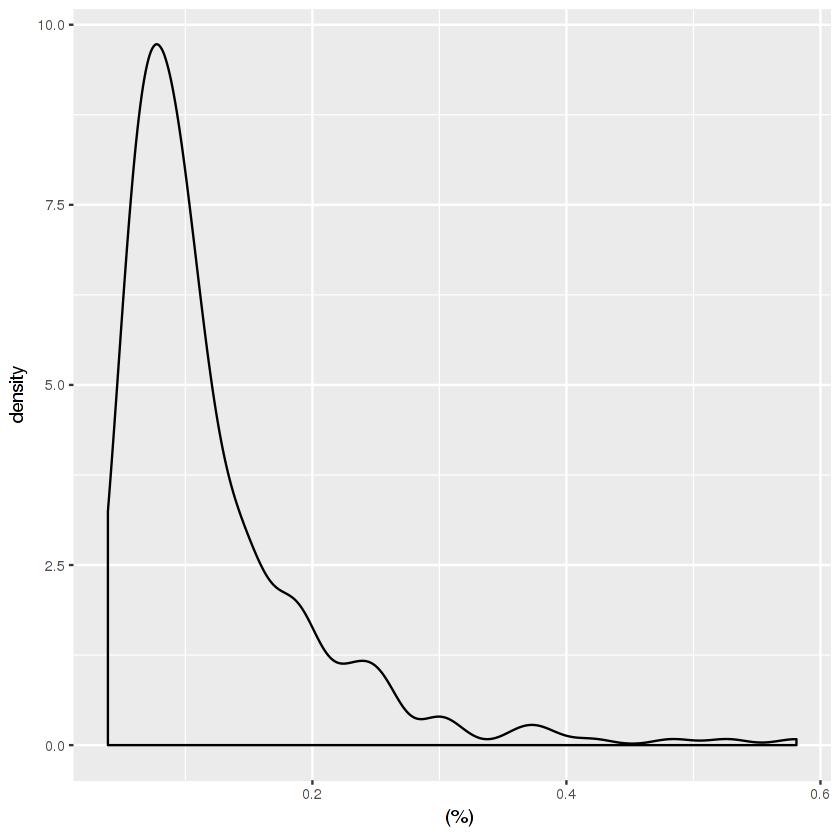

In [78]:
df$`换手率(%)` <- as.double(df$`换手率(%)`)
ggplot(df) +
  geom_density(aes(`换手率(%)`))

### 67.计算前一天与后一天收盘价的差值

In [ ]:
df %>%
  summarise(delta = `收盘价(元)` - lag(`收盘价(元)`))

### 68.计算前一天与后一天收盘价变化率

In [ ]:
df %>%
  summarise(pct_change = (`收盘价(元)` - lag(`收盘价(元)`))/lag(`收盘价(元)`))

### 69.设置日期为索引

In [81]:
df %>%
  column_to_rownames(var='日期')

Warning message:
“Setting row names on a tibble is deprecated.”

,﻿代码,简称,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
2016-01-04,600000.SH,浦发银行,16.1356,16.1444,16.1444,15.4997,15.7205,42240610,754425783,-0.4151,-2.5725,17.8602,0.2264,3.32032e+11,3.32032e+11,18653471415,6.5614
2016-01-05,600000.SH,浦发银行,15.7205,15.4644,15.9501,15.3672,15.8618,58054793,1034181474,0.1413,0.8989,17.8139,0.3112,3.35016e+11,3.35016e+11,18653471415,6.6204
2016-01-06,600000.SH,浦发银行,15.8618,15.8088,16.0208,15.6234,15.9855,46772653,838667398,0.1236,0.7795,17.9307,0.2507,3.37628e+11,3.37628e+11,18653471415,6.6720
2016-01-07,600000.SH,浦发银行,15.9855,15.7205,15.8088,15.3672,15.4644,11350479,199502702,-0.5211,-3.2597,17.5766,0.0608,3.26622e+11,3.26622e+11,18653471415,6.4545
2016-01-08,600000.SH,浦发银行,15.4644,15.6675,15.7912,14.9345,15.4467,71918296,1262105060,-0.0177,-0.1142,17.5492,0.3855,3.26249e+11,3.26249e+11,18653471415,6.4471
2016-01-11,600000.SH,浦发银行,15.4467,15.1994,15.4114,14.9786,15.0581,90177135,1550155933,-0.3886,-2.5157,17.1901,0.4834,3.18042e+11,3.18042e+11,18653471415,6.2849
2016-01-12,600000.SH,浦发银行,15.0581,15.1641,15.4732,15.0846,15.4114,55374454,964061502,0.3533,2.3460,17.4099,0.2969,3.25503e+11,3.25503e+11,18653471415,6.4324
2016-01-13,600000.SH,浦发银行,15.4114,15.5174,15.8088,15.3231,15.3584,47869312,843717365,-0.0530,-0.3438,17.6254,0.2566,3.24384e+11,3.24384e+11,18653471415,6.4102
2016-01-14,600000.SH,浦发银行,15.3584,15.0140,15.8883,14.9168,15.8265,54838833,966117848,0.4681,3.0477,17.6174,0.2940,3.34270e+11,3.34270e+11,18653471415,6.6056
2016-01-15,600000.SH,浦发银行,15.8265,15.7205,16.0296,15.4732,15.5262,46723139,836146426,-0.3003,-1.8973,17.8958,0.2505,3.27928e+11,3.27928e+11,18653471415,6.4803


### 70.以5个数据作为一个数据滑动窗口，在这个5个数据上取均值(收盘价)

In [ ]:
library(RcppRoll)
df %>%
  transmute(avg_5 = roll_mean(`收盘价(元)`,n = 5,align="right",fill = NA))

### 71.以5个数据作为一个数据滑动窗口，计算这五个数据总和(收盘价)

In [ ]:
df %>%
  transmute(sum_5 = roll_sum(`收盘价(元)`,n = 5,align="right",fill = NA))

### 72.将收盘价5日均线、20日均线与原始数据绘制在同一个图上

In [ ]:
df %>%
  mutate(avg_5 = roll_mean(`收盘价(元)`,n = 5,align="right",fill = NA),
         avg_20 = roll_mean(`收盘价(元)`,n = 20,align="right",fill = NA)) %>%
  ggplot() +
  geom_line(aes(日期,`收盘价(元)`),color = 'steelblue',size = 1.2) +
  geom_line(aes(日期,avg_5),color = 'orange',size = 1.2) +
  geom_line(aes(日期,avg_20),color = 'green',size = 1.2)

### 73.按周为采样规则，取一周收盘价最大值

In [84]:
library(plyr)

res <- dlply(df,.(cut(日期,"1 week")),"[")
res_max <- sapply(res,function(n)max(n$`收盘价(元)`),simplify=TRUE)
as.data.frame(res_max)

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



,res_max
2016-01-04,15.9855
2016-01-11,15.8265
2016-01-18,15.6940
2016-01-25,15.0405
2016-02-01,16.2328
2016-02-15,16.2946
2016-03-07,14.9875
2016-03-14,15.9236
2016-03-21,16.0296
2016-03-28,16.0561


### 74.绘制重采样数据与原始数据

In [ ]:
res %>%
  rownames_to_column('date')
res$date <- as.Date(res$date)

ggplot(df) +
  geom_line(aes(日期,`收盘价(元)`),color = 'steelblue',size = 1.2) +
  geom_line(data = res, aes(date,res_max),
            color = 'orange',size = 1.2)

### 75.将数据往后移动5天

In [86]:
lag(df,5)

﻿代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
NA,NA,NA,NA,NA,600000.SH,浦发银行,2016-01-04,16.1356,16.1444,16.1444,15.4997,15.7205,42240610,754425783,-0.4151,-2.5725,17.8602
NA,NA,NA,NA,NA,600000.SH,浦发银行,2016-01-05,15.7205,15.4644,15.9501,15.3672,15.8618,58054793,1034181474,0.1413,0.8989,17.8139
NA,NA,NA,NA,NA,600000.SH,浦发银行,2016-01-06,15.8618,15.8088,16.0208,15.6234,15.9855,46772653,838667398,0.1236,0.7795,17.9307
NA,NA,NA,NA,NA,600000.SH,浦发银行,2016-01-07,15.9855,15.7205,15.8088,15.3672,15.4644,11350479,199502702,-0.5211,-3.2597,17.5766
NA,NA,NA,NA,NA,600000.SH,浦发银行,2016-01-08,15.4644,15.6675,15.7912,14.9345,15.4467,71918296,1262105060,-0.0177,-0.1142,17.5492
NA,NA,NA,NA,NA,600000.SH,浦发银行,2016-01-11,15.4467,15.1994,15.4114,14.9786,15.0581,90177135,1550155933,-0.3886,-2.5157,17.1901
NA,NA,NA,NA,NA,600000.SH,浦发银行,2016-01-12,15.0581,15.1641,15.4732,15.0846,15.4114,55374454,964061502,0.3533,2.3460,17.4099
NA,NA,NA,NA,NA,600000.SH,浦发银行,2016-01-13,15.4114,15.5174,15.8088,15.3231,15.3584,47869312,843717365,-0.0530,-0.3438,17.6254
NA,NA,NA,NA,NA,600000.SH,浦发银行,2016-01-14,15.3584,15.0140,15.8883,14.9168,15.8265,54838833,966117848,0.4681,3.0477,17.6174
NA,NA,NA,NA,NA,600000.SH,浦发银行,2016-01-15,15.8265,15.7205,16.0296,15.4732,15.5262,46723139,836146426,-0.3003,-1.8973,17.8958


### 76.将数据向前移动5天

In [87]:
lead(df,5)

﻿代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
16.1444,15.4997,15.7205,42240610,754425783,-0.4151,-2.5725,17.8602,0.2264,3.32032e+11,3.32032e+11,18653471415,6.5614,NA,NA,NA,NA,NA
15.9501,15.3672,15.8618,58054793,1034181474,0.1413,0.8989,17.8139,0.3112,3.35016e+11,3.35016e+11,18653471415,6.6204,NA,NA,NA,NA,NA
16.0208,15.6234,15.9855,46772653,838667398,0.1236,0.7795,17.9307,0.2507,3.37628e+11,3.37628e+11,18653471415,6.6720,NA,NA,NA,NA,NA
15.8088,15.3672,15.4644,11350479,199502702,-0.5211,-3.2597,17.5766,0.0608,3.26622e+11,3.26622e+11,18653471415,6.4545,NA,NA,NA,NA,NA
15.7912,14.9345,15.4467,71918296,1262105060,-0.0177,-0.1142,17.5492,0.3855,3.26249e+11,3.26249e+11,18653471415,6.4471,NA,NA,NA,NA,NA
15.4114,14.9786,15.0581,90177135,1550155933,-0.3886,-2.5157,17.1901,0.4834,3.18042e+11,3.18042e+11,18653471415,6.2849,NA,NA,NA,NA,NA
15.4732,15.0846,15.4114,55374454,964061502,0.3533,2.3460,17.4099,0.2969,3.25503e+11,3.25503e+11,18653471415,6.4324,NA,NA,NA,NA,NA
15.8088,15.3231,15.3584,47869312,843717365,-0.0530,-0.3438,17.6254,0.2566,3.24384e+11,3.24384e+11,18653471415,6.4102,NA,NA,NA,NA,NA
15.8883,14.9168,15.8265,54838833,966117848,0.4681,3.0477,17.6174,0.2940,3.34270e+11,3.34270e+11,18653471415,6.6056,NA,NA,NA,NA,NA
16.0296,15.4732,15.5262,46723139,836146426,-0.3003,-1.8973,17.8958,0.2505,3.27928e+11,3.27928e+11,18653471415,6.4803,NA,NA,NA,NA,NA


### 77.使用expending函数计算开盘价的移动窗口均值

In [88]:
#R中没有expanding完全一致的函数
#考虑到expanding实际功能就是累积均值
#可以用cummean
#但cummean的功能和我预想的不同
#可能是包之间相互干扰
#最后采用cumsum/1:n的形式完成本题

res <- df %>%
  transmute(cummean = cumsum(`开盘价(元)`)/1:dim(df)[1])

### 78.绘制上一题的移动均值与原始数据折线图

In [ ]:
library(tidyr)
df %>%
  cbind(res) %>%
  dplyr::rename(Opening_Price = `开盘价(元)`,
         Expanding_Open_Mean = cummean) %>%
  select(日期,Opening_Price,Expanding_Open_Mean) %>%
  pivot_longer(c(Opening_Price,Expanding_Open_Mean),
               names_to = 'type',
               values_to ='price') %>%
  ggplot(aes(日期,price,color = type)) +
  geom_line(size=1.2) +
  scale_color_manual(values=c('orange','steelblue')) +
  theme_bw() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    legend.title = element_blank(),
    legend.position = c(0.9, 0.9)
  )

### 79.计算布林指标

In [ ]:
df <- df %>%
  mutate(avg_20 = roll_mean(`收盘价(元)`,n = 20,align="right",fill = NA),
         upper_bound = avg_20 + 2 * roll_sd(`收盘价(元)`,n = 20,align="right",fill = NA),
         lower_bound = avg_20 - 2 * roll_sd(`收盘价(元)`,n = 20,align="right",fill = NA))

### 80.计算布林线并绘制

In [ ]:
df %>%
  dplyr::rename(former_30_days_rolling_Close_mean = avg_20,
                Closing_Price = `收盘价(元)`) %>%
  select(日期,Closing_Price,
           former_30_days_rolling_Close_mean,upper_bound,lower_bound) %>%
  pivot_longer(c(Closing_Price,former_30_days_rolling_Close_mean,upper_bound,lower_bound),
               names_to = 'type',
               values_to ='price') %>%
  ggplot(aes(日期,price,color = type)) +
  geom_line(size=1.2) +
  scale_color_manual(values=c('steelblue','orange','red','green')) +
  theme_bw() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    legend.title = element_blank(),
    legend.position = c(0.6, 0.2)
  )

## 第四期｜科学计算：81-100
备注：在Pandas120题中，本期为NumPy结合，R中则没有NumPy，

尽可能保持一致
详情点击：https://mp.weixin.qq.com/s/WvgOlFGK0FToobl9ws2oSQ

### 81.查看包的版本

In [92]:
packageVersion("tidyverse")

packageVersion("dplyr")


[1] ‘1.1.1’

[1] ‘0.5.0’

### 82.从数组创建DataFrame

In [93]:
df1 <- sapply(20,function(n) {
  replicate(n,sample(1:100,1))
}) %>%
  as.data.frame(.) %>%
  dplyr::rename(`0` = V1)

### 83.生成20个0-100固定步长的数

In [ ]:
df2 <- as.data.frame(seq(0,99,5)) %>%
  dplyr::rename(`0` = "seq(0, 99, 5)")

### 84.生成20个指定分布(如标准正态分布)的数

In [ ]:
df3 <- as.data.frame(rnorm(20,0,1)) %>%
  dplyr::rename(`0` = "rnorm(20, 0, 1)")

### 85.将df1，df2，df3按照行合并为新DataFrame

In [ ]:
df <- rbind(df1,df2,df3)

### 86.将df1，df2，df3按照列合并为新DataFrame

In [ ]:
df <- cbind(df1,df2,df3)
names(df) <- c(0,1,2)

### 87.查看df所有数据的最小值、25%分位数、中位数、75%分位数、最大值

In [ ]:
summary(unlist(df))

### 88.修改列名为col1,col2,col3

In [ ]:
df <- df %>%
  dplyr::rename(col1 = 1,
                col2 = 2,
                col3 = 3)
# 或者用类似pandas的方法
names(df) <- c('col1','col2','col3')

### 89.提取第一列中不在第二列出现的数字

In [ ]:
df[!(df$col1 %in% df$col2),1]

### 90.提取第一列和第二列出现频率最高的三个数字

In [ ]:
count(unlist(c(df$col1,df$col2))) %>%
  arrange(desc(freq)) %>%
  filter(row_number() <= 3)

### 91.提取第一列中可以整除5的数字位置

In [ ]:
which(df['col1'] %% 5==0)

### 92.计算第一列数字前一个与后一个的差值

In [ ]:
df %>%
  summarise(col1 - lag(col1)) %>%
  na.omit(.) # 不去NA也可以，pandas没有去除

### 93.将col1,col2,clo3三列顺序颠倒

In [ ]:
df %>%
  select(col3,col2,everything())

### 94.提取第一列位置在1,10,15的数字

In [ ]:
df[c(1,10,15) + 1,1]

### 95.找第一列的局部最大值位置,即比它前一个与后一个数字的都大的数字

In [ ]:
res1 <- which((df$col1 - lag(df$col1) > 0))
res2 <- which((df$col1 - lead(df$col1) > 0))

intersect(res1,res2)
# [1] 3 5 7 12 14 17 19

# 另一种方法，类似pandas的用符号判断

res <- sign(df$col1 - lag(df$col1))

which(res - lag(res) == -2) - 1
# # [1] 3 5 7 12 14 17 19

### 96.按行计算df的每一行均值

In [ ]:
rowMeans(df)

### 97.对第二列计算移动平均值
备注
每次移动三个位置，不可以使用自定义函数

In [ ]:
library(RcppRoll)

df %>%
  summarise(avg_3 = roll_mean(col2, n=3))

### 98.将数据按照第三列值的大小升序排列

In [ ]:
df <- df %>%
  arrange(col3)

### 99.将第一列大于50的数字修改为'高'

In [ ]:
df[df$col1 > 50,1] <- '高'

### 100.计算第一列与第二列之间的欧式距离

In [ ]:
# 可以利用概念计算
res <- (df$col1 - df$col2) ^ 2
sqrt(sum(res))
# [1] 197.0102

# 也可以利用dist函数，但需要形成两个不同的观测
dist(rbind(df$col1,df$col2))
# 1
# 2 197.0102


### 第五期｜一些补充：101-120

### 101.从CSV文件中读取指定数据
从数据1中的前10行中读取positionName, salary两列

In [ ]:
#一步读取文件的指定列用readr包或者原生函数都没办法
#如果文件特别大又不想全部再选指定列可以用如下办法
#基本思想先读取较少的数据获取列名
#给目标列以外的列打上NULL导致第二次读取文件时NULL列丢失即可

res <- read.csv('数据1.csv',encoding = 'GBK',nrows = 3)
classes <- sapply(res, class)
classes[-match(c('positionName','salary'),names(classes))] <-
  rep('NULL', length(classes) - 2)

df <- read.csv('数据1.csv',encoding = 'GBK',nrows = 10,
               colClasses = classes)

### 102.从数据2中读取数据并在读取数据时将薪资大于10000的为改为高

In [99]:
library(readr)

df2 <- read_csv('数据2.csv') %>%
  mutate('学历要求',
         '薪资水平' = ifelse(
           薪资水平 > 10000,'高','低'))

Parsed with column specification:
cols(
  `﻿学历要求` = col_character(),
  薪资水平 = col_integer()
)


### 103.从上一题数据中，对薪资水平列每隔20行进行一次抽样

In [100]:
df2[seq(1,dim(df2)[1],20),]

﻿学历要求,薪资水平
本科,高
本科,高
本科,高
本科,高
本科,高
本科,高
本科,高
本科,高
硕士,高
硕士,高


### 104.将数据取消使用科学计数法

In [101]:
df <- tibble(data = runif(10)^10)
round(df,3)

data
0.000
0.000
0.000
0.040
0.000
0.000
0.000
0.363
0.000
0.000


### 105.将上一题的数据转换为百分数

In [ ]:
tibble(data = str_glue('{round(df$data * 100,2)}%'))

### 106.查找上一题数据中第3大值的行号

In [103]:
df %>%
  mutate(nrow = rownames(.)) %>%
  arrange(desc(data)) %>%
  filter(row_number() == 3) %>%
  select(nrow)


nrow
5


### 107.反转df的行

In [104]:
df %>%
  arrange(desc(rownames(.)))

data
3.451450e-08
3.626011e-01
3.639104e-07
6.680218e-06
1.661706e-05
4.046237e-02
5.045447e-06
8.544812e-20
1.464476e-10
1.258704e-08


### 108.按照多列对数据进行合并
输入
df1= pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
'key2': ['K0', 'K1', 'K0', 'K1'],
'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3']})

df2= pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
'key2': ['K0', 'K0', 'K0', 'K0'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']})

In [105]:
df1 <- data.frame(
  "key1" = c("K0","K0","K1","K2"),
  "key2" = c("K0","K1","K0","K1"),
  "A" = paste0('A',0:3),
  "B" = paste0('B',0:3)
)

df2 <- data.frame(
  "key1" = c("K0","K1","K1","K2"),
  "key2" = paste0('K',rep(0,4)),
  "C" = paste0('C',0:3),
  "D" = paste0('D',0:3)
)

full_join(df1,df2,by = c('key1','key2')) %>%
  na.omit(.)

Warning message in full_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining factors with different levels, coercing to character vector”

,key1,key2,A,B,C,D
1,K0,K0,A0,B0,C0,D0
3,K1,K0,A2,B2,C1,D1
4,K1,K0,A2,B2,C2,D2


### 109.按照多列对数据进行合并,只保存df1的数据

In [106]:
left_join(df1,df2,by = c('key1','key2'))

Warning message in left_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining factors with different levels, coercing to character vector”

key1,key2,A,B,C,D
K0,K0,A0,B0,C0,D0
K0,K1,A1,B1,NA,NA
K1,K0,A2,B2,C1,D1
K1,K0,A2,B2,C2,D2
K2,K1,A3,B3,NA,NA


### 110.再次读取数据1并显示所有的列
数据中由于列数较多中间列不显示

In [107]:
df <- read_csv('数据1.csv', locale = locale(encoding = "GBK")) %>%
  print(width = Inf)

Parsed with column specification:
cols(
  .default = col_character(),
  positionId = col_integer(),
  companyId = col_integer(),
  salary = col_integer(),
  publisherId = col_integer(),
  approve = col_integer(),
  latitude = col_double(),
  longitude = col_double(),
  resumeProcessRate = col_integer(),
  resumeProcessDay = col_integer(),
  score = col_integer(),
  newScore = col_integer(),
  matchScore = col_double(),
  isSchoolJob = col_integer(),
  adWord = col_integer(),
  pcShow = col_integer(),
  appShow = col_integer(),
  deliver = col_integer(),
  isHotHire = col_integer(),
  count = col_integer(),
  famousCompany = col_logical()
)
See spec(...) for full column specifications.


# A tibble: 105 × 53
   positionId   positionName companyId
        <int>          <chr>     <int>
1     6802721       数据分析    475770
2     5204912       数据建模     50735
3     6877668       数据分析    100125
4     6496141       数据分析     26564
5     6467417       数据分析     29211
6     6882347       数据分析     94826
7     6841659       数据分析    348784
8     6764018 数据建模工程师     13163
9     6458372   数据分析专家     34132
10    6786904     数据分析师     13163
                                                                 companyLogo
                                                                       <chr>
1                      i/image2/M01/B7/3E/CgoB5lwPfEaAdn8WAABWQ0Jgl5s31.jpeg
2                        image1/M00/00/85/CgYXBlTUXeeAR0IjAABbroUk-dw977.png
3  image2/M00/0C/57/CgqLKVYcOA2ADcFuAAAE8MukIKA745.png?cc=0.8089290193747729
4                      i/image2/M01/F7/3F/CgoB5lyGAQGAZeI-AAAdOqXecnw673.jpg
5                      i/image2/M01/77/B8/CgoB5l1WDyGATNP5AAAlY3h88SY623.png
6  image2/M00/04/1

### 111.查找secondType与thirdType值相等的行号

In [108]:
df %>%
  mutate(nrow = rownames(.)) %>%
  filter(secondType == thirdType) %>%
  select(nrow) %>%
  unlist()

nrow1  nrow2  nrow3  nrow4  nrow5  nrow6  nrow7  nrow8  nrow9 nrow10 nrow11 
   "1"    "3"    "5"    "6"    "7"   "11"   "15"   "24"   "26"   "28"   "29" 
nrow12 nrow13 nrow14 nrow15 nrow16 nrow17 nrow18 nrow19 nrow20 nrow21 nrow22 
  "30"   "31"   "34"   "38"   "39"   "40"   "41"   "42"   "49"   "50"   "53" 
nrow23 nrow24 nrow25 nrow26 nrow27 nrow28 nrow29 nrow30 nrow31 nrow32 nrow33 
  "54"   "56"   "58"   "62"   "66"   "67"   "68"   "72"   "74"   "75"   "76" 
nrow34 nrow35 nrow36 nrow37 nrow38 nrow39 nrow40 nrow41 nrow42 
  "80"   "81"   "83"   "86"   "89"   "90"   "92"   "97"  "101"

### 112.查找薪资大于平均薪资的第三个数据

In [109]:
df %>%
  mutate(nrow = rownames(.)) %>%
  filter(salary > mean(salary)) %>%
  select(nrow) %>%
  filter(row_number() == 3)
# # A tibble: 1 x 1
# nrow
# <chr>
# 1 6

nrow
6


### 113.将上一题数据的salary列开根号

In [110]:
df %>%
  summarise(salary_sqrt = sqrt(salary))

salary_sqrt
193.6492
122.4745
59.1608
212.1320
173.2051
223.6068
173.2051
187.0829
244.9490
200.0000


### 114.将上一题数据的linestaion列按_拆分

In [111]:
df <- df %>%
  mutate(split = str_split(linestaion,'_'))

### 115.查看上一题数据中一共有多少列

In [112]:
length(df)

[1] 54

### 116.提取industryField列以'数据'开头的行

In [114]:
df[grep("^数据", df$industryField),]

positionId,positionName,companyId,companyLogo,companySize,industryField,financeStage,companyLabelList,firstType,secondType,...,pcShow,appShow,deliver,gradeDescription,promotionScoreExplain,isHotHire,count,aggregatePositionIds,famousCompany,split
6458372,数据分析专家,34132,i/image2/M01/F8/DE/CgoB5lyHTJeAP7v9AAFXUt4zJo4515.png,150-500人,"数据服务,广告营销",A轮,"['开放式办公', '扁平管理', '带薪假期', '弹性工作时间']",产品|需求|项目类,数据分析,...,0,0,0,NA,NA,0,0,[],FALSE,NA
6804629,数据分析师,34132,i/image2/M01/F8/DE/CgoB5lyHTJeAP7v9AAFXUt4zJo4515.png,150-500人,"数据服务,广告营销",A轮,"['开放式办公', '扁平管理', '带薪假期', '弹性工作时间']",产品|需求|项目类,数据分析,...,0,0,0,NA,NA,0,0,[],FALSE,NA
6804489,资深数据分析师,34132,i/image2/M01/F8/DE/CgoB5lyHTJeAP7v9AAFXUt4zJo4515.png,150-500人,"数据服务,广告营销",A轮,"['开放式办公', '扁平管理', '带薪假期', '弹性工作时间']",开发|测试|运维类,数据开发,...,0,0,0,NA,NA,0,0,[],FALSE,NA
6267370,数据分析专家,31544,image1/M00/00/48/CgYXBlTUXOaADKooAABjQoD_n1w508.png,150-500人,数据服务,不需要融资,"['专业红娘牵线', '节日礼物', '技能培训', '岗位晋升']",开发|测试|运维类,数据开发,...,0,0,0,NA,NA,0,0,[],FALSE,"4号线 , 中医药大学;4号线, 联庄"
6804489,资深数据分析师,34132,i/image2/M01/F8/DE/CgoB5lyHTJeAP7v9AAFXUt4zJo4515.png,150-500人,"数据服务,广告营销",A轮,"['开放式办公', '扁平管理', '带薪假期', '弹性工作时间']",开发|测试|运维类,数据开发,...,0,0,0,NA,NA,0,0,[],FALSE,NA
6242470,数据分析师,31544,image1/M00/00/48/CgYXBlTUXOaADKooAABjQoD_n1w508.png,150-500人,数据服务,不需要融资,"['专业红娘牵线', '节日礼物', '技能培训', '岗位晋升']",产品|需求|项目类,数据分析,...,0,0,0,NA,NA,0,0,[],FALSE,"4号线 , 中医药大学;4号线, 联庄"
6680900,数据分析师 (MJ000250),114335,i/image2/M00/17/C2/CgoB5ln5lUuAM8oSAADO2Rz54hQ336.png,150-500人,数据服务,B轮,"['股票期权', '弹性工作', '领导好', '五险一金']",产品|需求|项目类,产品经理,...,0,0,0,NA,NA,0,0,[],FALSE,NA
6680900,数据分析师 (MJ000250),114335,i/image2/M00/17/C2/CgoB5ln5lUuAM8oSAADO2Rz54hQ336.png,150-500人,数据服务,B轮,"['股票期权', '弹性工作', '领导好', '五险一金']",产品|需求|项目类,产品经理,...,0,0,0,NA,NA,0,0,[],FALSE,NA
5683671,数据分析实习生 (MJ000087),114335,i/image2/M00/17/C2/CgoB5ln5lUuAM8oSAADO2Rz54hQ336.png,150-500人,数据服务,B轮,"['股票期权', '弹性工作', '领导好', '五险一金']",开发|测试|运维类,后端开发,...,0,0,0,NA,NA,0,0,[],FALSE,NA
6046866,数据分析师,543802,i/image2/M01/63/3C/CgotOV0ulwOAU8KWAAAsMECc53M647.png,15-50人,数据服务,不需要融资,[],产品|需求|项目类,数据分析,...,0,0,0,NA,NA,0,0,[],FALSE,"2号线 , 文新;2号线, 三坝"


### 117.以salary score 和 positionID制作数据透视

In [115]:
df <- df %>%
  group_by(positionId) %>%
  dplyr::summarise(salary = mean(salary),
            score = mean(score)) %>%
  as.data.frame(.)
rownames(df) <- NULL
tibble::column_to_rownames(df,var='positionId')

,salary,score
5203054,30000,4.0
5204912,15000,176.0
5269002,37500,1.0
5453691,30000,4.0
5519962,37500,14.0
5520623,30000,6.0
5559894,30000,12.0
5604926,27500,6.0
5683671,26500,3.0
5921220,37500,4.5


### 118.同时对salary、score两列进行计算

In [ ]:
res <- df %>%
  select(salary,score) %>%
  pivot_longer(c(salary,score),names_to = 'type',values_to = 'value') %>%
  group_by(type) %>%
  summarise(sum = sum(value),mean = mean(value),min = min(value))

rownames(res) <- NULL

res %>%
  column_to_rownames('type') %>%
  t(.)


### 119.对不同列执行不同的计算
对salary求平均，对score列求和

In [117]:
df %>%
  summarise(salary_sum = sum(salary),
            score_mean = mean(score))


salary_sum,score_mean
3009750,13.42632


### 120.计算并提取平均薪资最高的区

In [ ]:
df %>%
  group_by(district) %>%
  summarise(avg = mean(salary)) %>%
  arrange(desc(avg)) %>%
  filter(row_number() == 1)